# Optimizers

In this sheet we will look at three different optimizers and their behavior.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def df(x):
    return 2*x

def g(x):
    return 1/3*x**3

def dg(x):
    return x**2

In [7]:
def vanilla_gd(x_start, learning_rate, epochs, d = df):
    x = [x_start]
    for _ in range(epochs):
        grad = d(x[-1])
        # The adjustment of the parameter is the same for all parameters
        x.append(x[-1] - learning_rate * grad)
    return x

def adagrad(x_start, learning_rate, epochs, d = df):
    x = [x_start]
    grad_squared_sum = 0
    for _ in range(epochs):
        grad = d(x[-1])
        # The adjustment of the parameter depends on the size of the gradient
        # If the gradient is large, the adjustment is small
        # In a sense, each parameter has its own learning rate
        grad_squared_sum += grad**2
        x.append(x[-1] - learning_rate / (np.sqrt(grad_squared_sum) + 1e-7) * grad)
    return x

def rmsprop(x_start, learning_rate, decay_rate, epochs, d = df):
    x = [x_start]
    grad_squared_sum = 0
    for _ in range(epochs):
        grad = d(x[-1])
        # The adjustment of the parameter depends on the size of the gradient
        # The decay rate is used to control the influence of the past gradients
        # The bigger the decay rate, the less the past gradients influence the adjustment
        grad_squared_sum = decay_rate * grad_squared_sum + (1 - decay_rate) * grad**2
        x.append(x[-1] - learning_rate / (np.sqrt(grad_squared_sum) + 1e-7) * grad)
    return x

In [8]:
x_start = 5
learning_rate = 0.1
epochs = 100

x_vanilla = vanilla_gd(x_start, learning_rate, epochs)
x_adagrad = adagrad(x_start, learning_rate, epochs)
x_rmsprop = rmsprop(x_start, learning_rate, 0.9, epochs)

print(f"Vanilla gradient descent: start at {x_start}, end at {x_vanilla[-1]}, f(x) = {f(x_vanilla[-1])}")
print(f"Adagrad: start at {x_start}, end at {x_adagrad[-1]}, f(x) = {f(x_adagrad[-1])}")
print(f"RMSprop: start at {x_start}, end at {x_rmsprop[-1]}, f(x) = {f(x_rmsprop[-1])}")

Vanilla gradient descent: start at 5, end at 1.0185179881672439e-09, f(x) = 1.0373788922202499e-18
Adagrad: start at 5, end at 3.283207382171083, f(x) = 10.779450714342698
RMSprop: start at 5, end at 2.3721946507571964e-16, f(x) = 5.627307461081057e-32


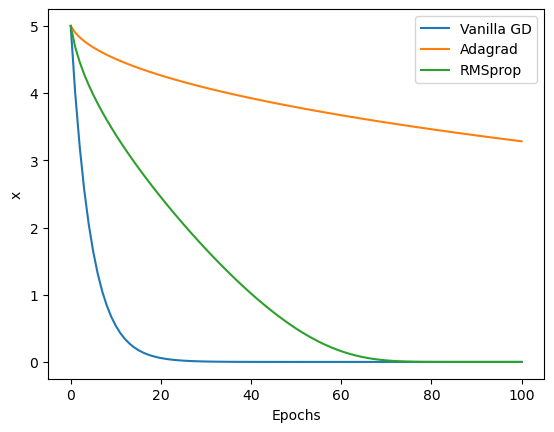

In [9]:
plt.plot(x_vanilla, label="Vanilla GD")
plt.plot(x_adagrad, label="Adagrad")
plt.plot(x_rmsprop, label="RMSprop")
plt.xlabel("Epochs")
plt.ylabel("x")
plt.legend()

Text(0, 0.5, 'x')

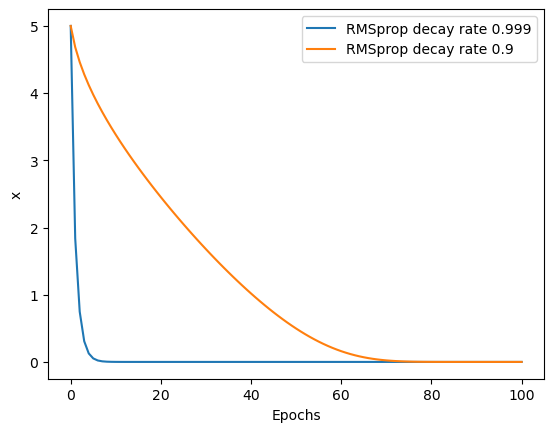

In [10]:
for i in [0.999, 0.9]:
    _ = rmsprop(x_start, learning_rate, i, epochs)
    plt.plot(_, label=f"RMSprop decay rate {i}")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("x")

## Vanilla Gradient descent

$$
\theta_{t+1, i} = \theta_{t, i} - \eta g_{t, i}
$$

* $\theta_{t+1, i}$ represents the updated value of the parameter $\theta_i$ at time step $t+1$.
* $\theta_{t, i}$ represents the current value of the parameter $\theta_i$ at time step $t$.
* $\eta$ is the learning rate.
* $g_{t, i}$ represents the gradient of the loss function with respect to the parameter $\theta_i$ at time step $t$.

Exploding gradients: [-88284.98181155683, -2338359689.021888, -1.6403778129111217e+18, -8.072518107273224e+35, -1.954966457767622e+71]


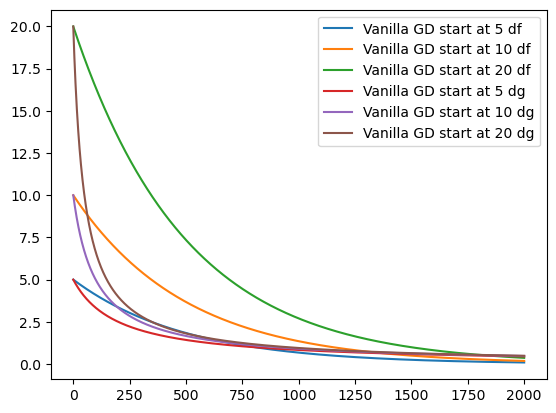

In [11]:
epochs = 2000
for d in [df, dg]:
    for s in [5, 10, 20]:
        _ = vanilla_gd(s, 1e-3, epochs, d)
        plt.plot(_, label=f"Vanilla GD start at {s} {d.__name__}")
plt.legend()

print('Exploding gradients:', vanilla_gd(5, 0.3, 10, dg)[-5:])

Notice, that we have reduced the learning rate for the plots. If we would keep the learning rate, the learning rates would become so big, that they become out of bounds. This is called the **exploding gradients** problem. Vice versa, it is also possible to receive **vanishing gradients** which do not contribute anymore.

## Adagrad

$$
\theta_{t+1, i} = \theta_{t, i} - \frac{\eta}{\sqrt{G_{t, ii} + \epsilon}}g_{t, i}
$$

* $\theta_{t+1, i}$ represents the updated value of the parameter $\theta_i$ at time step $t+1$.
* $\theta_{t, i}$ represents the current value of the parameter $\theta_i$ at time step $t$.
* $\eta$ is the learning rate.
* $G_{t, ii}$ represents the cumulative sum of squared gradients for the parameter $\theta_i$ up to time step $t$.
* $g_{t, i}$ represents the gradient of the loss function with respect to the parameter $\theta_i$ at time step $t$.
* $\epsilon$ is a small constant (usually added for numerical stability).

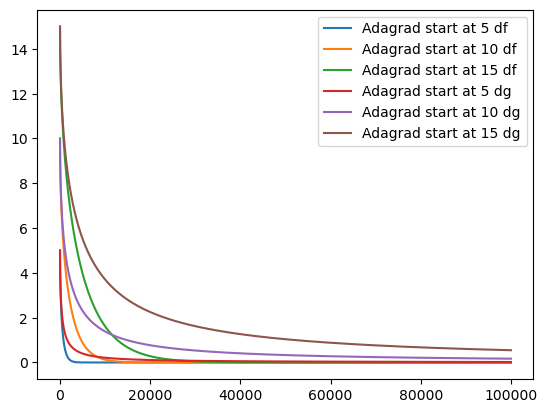

In [12]:
epochs = 100000
for d in [df, dg]:
    for s in [5, 10, 15]:
        _ = adagrad(s, learning_rate, epochs, d)
        plt.plot(_, label=f"Adagrad start at {s} {d.__name__}")
plt.legend()

Adagrad has been developed to adjust the learning rate parameter during training automatically. We can maintain our normal learning rate, as it is adjusted automatically. Unfortunately, is is not guaranteed, that Adagrad converges. TWhen he accumulated gradient becomes too big, the effective learning rate is reduced to 0. This can be seen in the the graph above for the **dg** function.

## RMSProp

$$ \theta_{t+1, i} = \theta_{t, i} - \frac{\eta}{\sqrt{E[g^2]t + \epsilon}} g_{t, i} $$

* $\theta_{t+1, i}$ represents the updated value of the parameter $\theta_i$ at time step $t+1$.
* $\theta_{t, i}$ represents the current value of the parameter $\theta_i$ at time step $t$.
* $\eta$ is the learning rate.
* $E[g^2]_t$ represents the moving average of squared gradients for the parameter $\theta_i$ up to time step $t$.
* $g_{t, i}$ represents the gradient of the loss function with respect to the parameter $\theta_i$ at time step $t$.
* $\epsilon$ is a small constant (usually added for numerical stability).

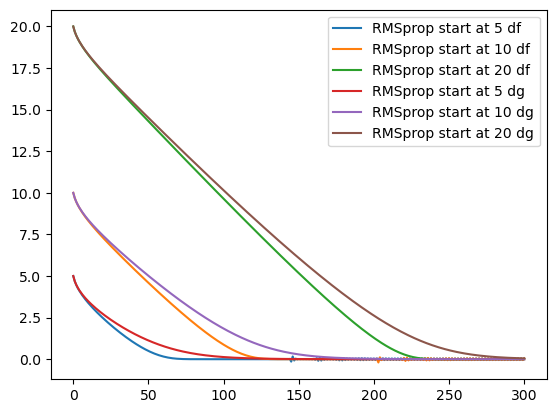

In [13]:
epochs = 300
for d in [df, dg]:
    for s in [5, 10, 20]:
        _ = rmsprop(s, learning_rate, 0.9, epochs, d)
        plt.plot(_, label=f"RMSprop start at {s} {d.__name__}")
plt.legend()

RMSProp is developed based on Adagrad. The gradients converge correctly. Past gradients are taken into account as with adagrad, but their influence is reduced over time.

## Summary
Choosing the right optimizer is not straightforward. You can try to start the a vanilla gradient descent. If you notice, that your weights are always exploding. Try go with an adaptive optimizer. But never neglect your data.
If you have a sparse datasets, some weights might be adjusted seldomly. Then an adaptive algorithm, e.g. **Adagrad** might also be the better choice, because it balances the weight updates w.r.t. accumulated gradients.

We have only looked at three algorithms. There are more optimizers like the very popular **Adam** optimizer.
